# K-means

In [2]:
from sklearn.cluster import KMeans
import numpy as np

In [4]:
X = np.array([[1,2],[1,4],[1,0],[10,2],[10,4],[10,0]])
kmeans = KMeans(n_clusters = 2).fit(X)

print(kmeans)

KMeans(n_clusters=2)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
print("결과 : ", kmeans.labels_)
print("predict [5,5], [6,6] : ", kmeans.predict([[5,5],[6,6]]))
print("중심들 \n", kmeans.cluster_centers_)

결과 :  [1 1 1 0 0 0]
predict [5,5], [6,6] :  [1 0]
중심들 
 [[10.  2.]
 [ 1.  2.]]


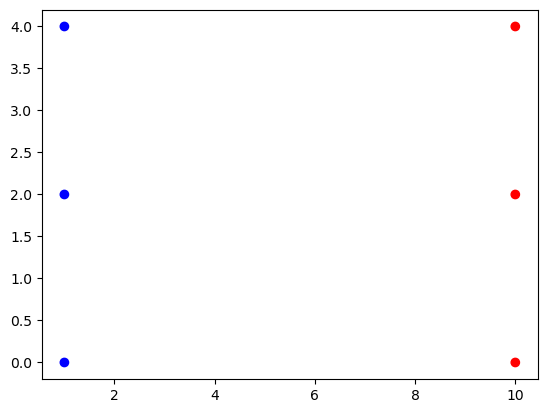

In [18]:
import matplotlib.pyplot as plt

palette = ['red','blue']
colors = [palette[label] for label in kmeans.labels_]

plt.figure()
plt.scatter(x=X[:,0], y=X[:,1], c=colors)
plt.show()

# DBSCAN

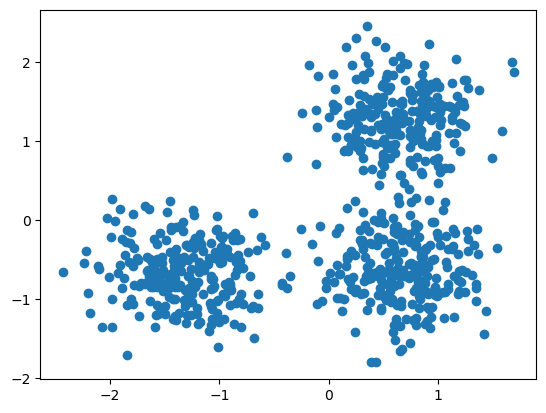

In [87]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1,1], [-1,-1], [1,-1]]
X, labels_true = make_blobs(n_samples = 750, centers = centers, cluster_std=0.4, random_state = 1001)

X = StandardScaler().fit_transform(X)

plt.scatter(X[:,0], X[:,1])
plt.show()

In [97]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps= 0.3, min_samples=10).fit(X)
labels_dbscan = db.labels_

cluster_num = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
noise_num = list(labels_dbscan).count(-1)
print(f"클러스터 개수 : {n_clusters_}, 노이즈 데이터 개수 : {n_noise_}")

클러스터 개수 : 1, 노이즈 데이터 개수 : 16


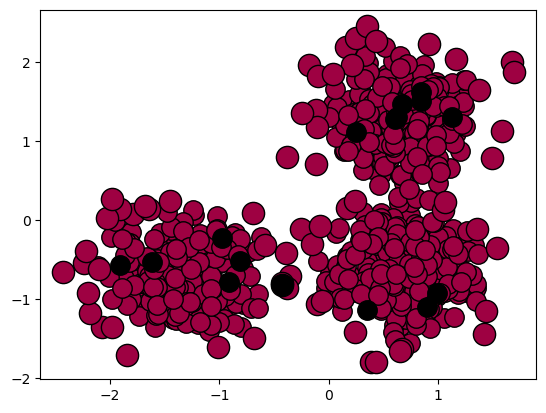

In [138]:
unique_labels = set(labels)

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0,0,0,1]
    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        'o',
        markerfacecolor=tuple(col),
        markeredgecolor='k',
        markersize=14
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        'o',
        markerfacecolor=tuple(col),
        markeredgecolor='k',
        markersize=16
    )
plt.show()